In [1]:
# importing the required packages
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.datasets import fetch_california_housing

In [2]:
data = california_housing = fetch_california_housing()  # fetching the california dataset

In [3]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'] )   # creating the dataframe

In [5]:
x = df['MedInc'].head(1000)      # assigning the training data into x variable

y = df['target'].head(1000)      # assigning the testing data into y variable

In [6]:
df1 = pd.DataFrame(data = x,columns=['MedInc','target'] )    # creating the sub dataframe for only 1 column

In [7]:
df1

,MedInc,target
0,8.3252,NaN
1,8.3014,NaN
2,7.2574,NaN
3,5.6431,NaN
4,3.8462,NaN
...,...,...
995,4.8624,NaN
996,9.1531,NaN
997,4.7361,NaN
998,5.4324,NaN


In [8]:
df1['target'] = y

In [9]:
df1

,MedInc,target
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.6431,3.413
4,3.8462,3.422
...,...,...
995,4.8624,1.924
996,9.1531,4.188
997,4.7361,2.168
998,5.4324,2.155


In [10]:
X = np.array(x).reshape(-1, 1)             # reshaping the data
Y = np.array(y).reshape(-1, 1)



In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y)     # splitting the training and testing data

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()                                   # creating the linear regression

In [13]:
lr.fit(x_train,y_train)                                   # fitting the data

LinearRegression()

In [14]:
lr.coef_,lr.intercept_                                    # printing the coefficients and intercept

(array([[0.37595289]]), array([0.64260501]))

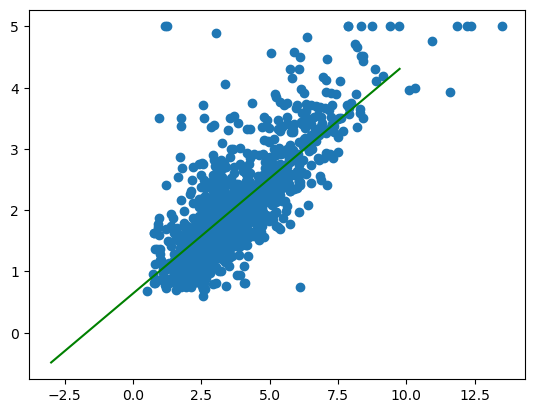

In [15]:
from matplotlib import pyplot                             # plotting the linear regression graph and datapoints
f = lambda x: lr.coef_ [0] * x + lr.intercept_ 
steps = list(np.arange(-3,10,0.25))
fitline = [f(step) for step in steps]
pyplot.plot(steps,fitline,color = 'green')
pyplot.scatter(x = df1['MedInc'], y = df1['target'])

In [86]:
#df1['target']  += 5
lr.score(X,Y)

0.5875862814076609

#### due to the intercept the fitline doesnot pass through (0,0), so we will modify the data to shift the line

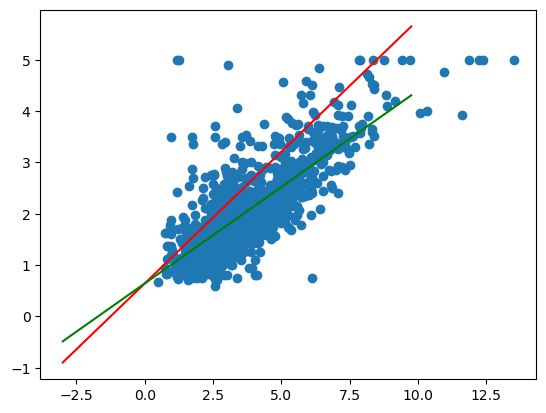

In [17]:
lr_a = LinearRegression(fit_intercept = False)               # making the fit intercept to be false 
lr_a.fit(x_train,y_train)

lr_b = LinearRegression(fit_intercept = True)                # making the fit intercept to be true to pass through origin
lr_b.fit(x_train,y_train)


f = lambda x: lr_a.coef_ [0] * x + lr.intercept_             # plotting the linear regression and datapoints
steps = list(np.arange(-3,10,0.25))
fitline = [f(step) for step in steps]
pyplot.plot(steps,fitline,color = 'red')

f = lambda x: lr_b.coef_ [0] * x + lr.intercept_ 
steps = list(np.arange(-3,10,0.25))
fitline = [f(step) for step in steps]
pyplot.plot(steps,fitline,color = 'green')


pyplot.scatter(x = df1['MedInc'], y = df1['target'])


In [18]:
housing_df = pd.DataFrame(data=np.c_[data['data'], data['target']],
                  columns=data['feature_names'] + ['target'])           # creating the data frame

In [21]:
housing_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [56]:
feature_names = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']
housing_x = housing_df[feature_names]
housing_x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [66]:
housing_y = housing_df['target']
housing_y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

<Axes: xlabel='Longitude', ylabel='target'>

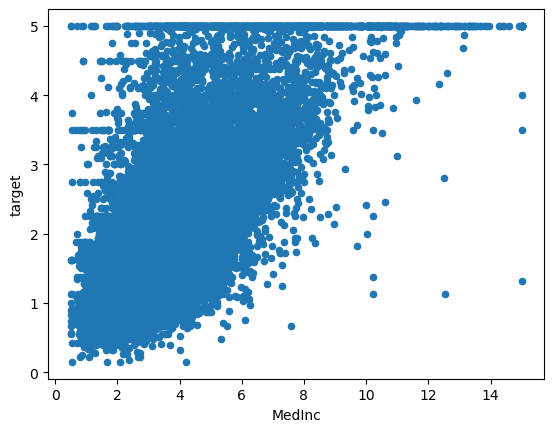

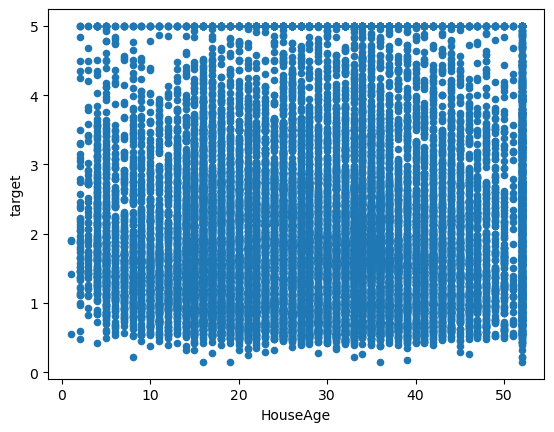

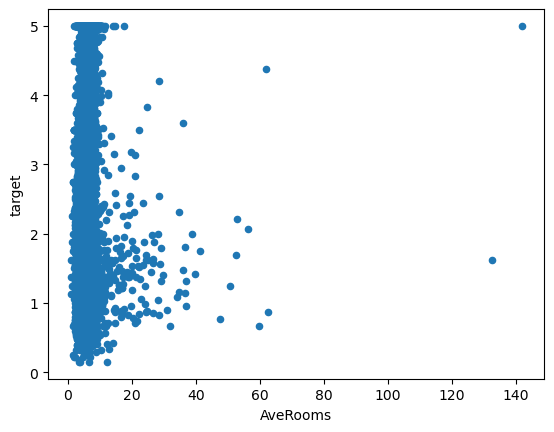

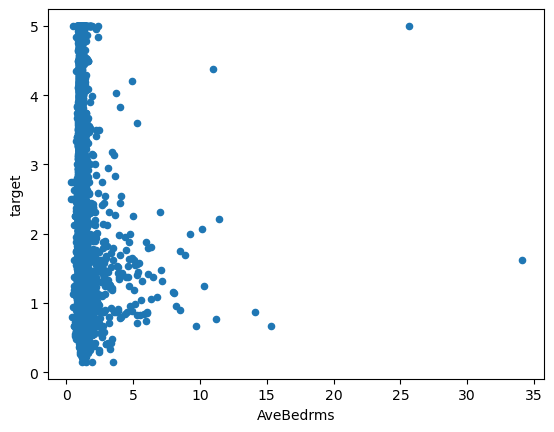

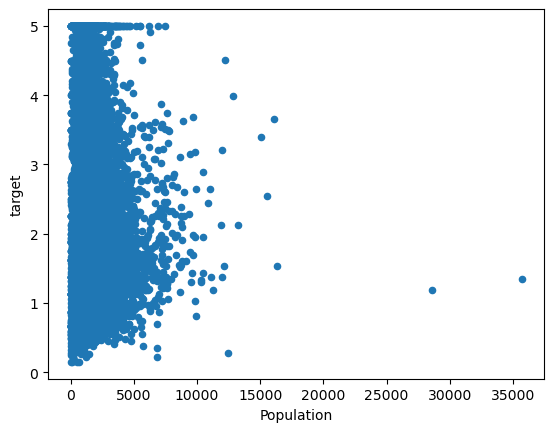

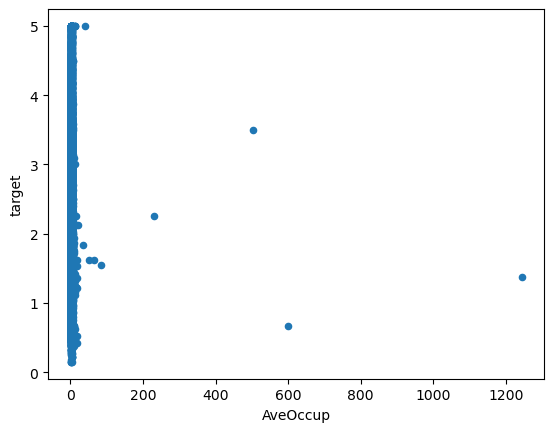

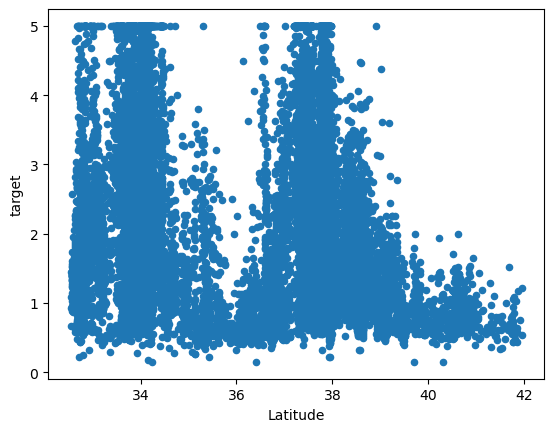

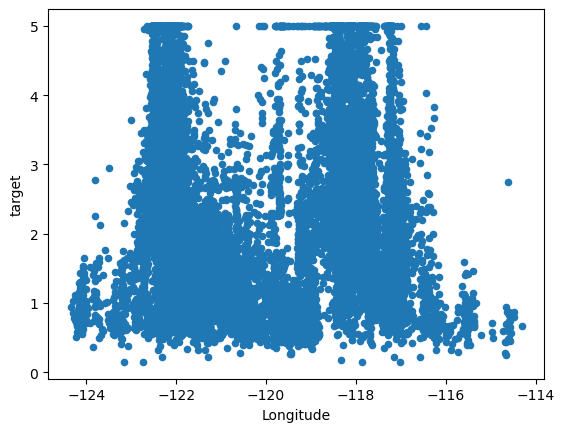

In [55]:
housing_df.plot.scatter(x='MedInc',y='target')                # plotting the scatter plot for each column to see the datapoints
housing_df.plot.scatter(x='HouseAge',y='target')
housing_df.plot.scatter(x='AveRooms',y='target')
housing_df.plot.scatter(x='AveBedrms',y='target')
housing_df.plot.scatter(x='Population',y='target')
housing_df.plot.scatter(x='AveOccup',y='target')
housing_df.plot.scatter(x='Latitude',y='target')
housing_df.plot.scatter(x='Longitude',y='target')


In [47]:
# housing_X = np.array(housing_x).reshape(-1, 1)
# housing_Y = housing_df['target'].values.reshape(-1, 1)


In [58]:
x_train,x_test,y_train,y_test = train_test_split(housing_x,housing_y)

In [59]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)

LinearRegression()

In [69]:
prediction = lr1.predict(housing_x.iloc[250].values.reshape(1, -1)) 
print(prediction)
print(housing_y.iloc[250])

[2.13548636]
1.191


/Users/shivakumargoudmucharla/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [72]:
lr1.score(housing_x,housing_y)

0.6050891685907197

In [75]:
print(lr1.coef_)
print(lr1.intercept_)

[ 4.50963694e-01  9.97582449e-03 -1.26570281e-01  8.04381300e-01
  6.90957168e-07 -3.97852703e-03 -4.19053708e-01 -4.31860790e-01]
-36.85179185744687


#### we will check with the first 4 columns 

In [80]:
feature_names1 = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']
housing_x1 = housing_df[feature_names1]
housing_y1 = housing_df['target']

In [83]:
lr2 = LinearRegression()
lr2.fit(housing_x1,housing_y1)
lr2.score(housing_x1,housing_y1)

0.5374890115824703

#### we can observe that the score is decreased by removing some relevant columns which helps to find the the house price

#### we will check with last 4 columns

In [84]:
feature_names2 = ['Population', 'AveOccup',
       'Latitude', 'Longitude']
housing_x2 = housing_df[feature_names2]
housing_y2 = housing_df['target']

In [85]:
lr3 = LinearRegression()
lr3.fit(housing_x2,housing_y2)
lr3.score(housing_x2,housing_y2)

0.24436629879745142

#### we can observe that the score is decresed more in this case that more relevant columns are not present in this model,
>from this we can conclude that these features are not more important than the first 4 columns as longitude and latitude doesnt give the house price